Python module to open a tissue image and to seperate it in small tiles. Tiles have the size of a ST spot, so that we can have the image and transcriptome analysis for each spot.

# Import

In [1]:
from PIL import Image
import json
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.patches import Rectangle

# Input

-png image
-json for the scale adjustement
-csv for informations on positions

In [2]:
#Image 34C
path="/disk2/user/cda/SpatialTranscriptomics/raw-data/High-resolution_tissue_images/V10F03-034/210223_BC_S7_V10F03-034_RJ.C1-Spot000001.jpg"
json_path = "/disk2/user/cda/SpatialTranscriptomics/processed-data/SpaceRanger-output_v1.0.0-rerun2023/V10F03-034_C/outs/spatial/scalefactors_json.json"
positionlist_path ="/disk2/user/cda/SpatialTranscriptomics/processed-data/SpaceRanger-output_v1.0.0-rerun2023/V10F03-034_C/outs/spatial/tissue_positions_list.csv"

In [1]:
#Image 34D
path="/disk2/user/cda/SpatialTranscriptomics/raw-data/High-resolution_tissue_images/V10F03-034/210223_BC_S7_V10F03-034_RJ.D1-Spot000001.jpg"
json_path = "/disk2/user/cda/SpatialTranscriptomics/processed-data/SpaceRanger-output_v1.0.0-rerun2023/V10F03-034_D/outs/spatial/scalefactors_json.json"
positionlist_path ="/disk2/user/cda/SpatialTranscriptomics/processed-data/SpaceRanger-output_v1.0.0-rerun2023/V10F03-034_D/outs/spatial/tissue_positions_list.csv"

In [18]:
#Image 34A
path="/disk2/user/cda/SpatialTranscriptomics/raw-data/High-resolution_tissue_images/V10F03-034/210223_BC_S7_V10F03-034_RJ.A1-Spot000001.jpg"
json_path = "/disk2/user/cda/SpatialTranscriptomics/processed-data/SpaceRanger-output_v1.0.0-rerun2023/V10F03-034_A/outs/spatial/scalefactors_json.json"
positionlist_path ="/disk2/user/cda/SpatialTranscriptomics/processed-data/SpaceRanger-output_v1.0.0-rerun2023/V10F03-034_A/outs/spatial/tissue_positions_list.csv"

In [2]:
#Image 34B
path="/disk2/user/cda/SpatialTranscriptomics/raw-data/High-resolution_tissue_images/V10F03-034/210223_BC_S7_V10F03-034_RJ.B1-Spot000001.jpg"
json_path = "/disk2/user/cda/SpatialTranscriptomics/processed-data/SpaceRanger-output_v1.0.0-rerun2023/V10F03-034_B/outs/spatial/scalefactors_json.json"
positionlist_path ="/disk2/user/cda/SpatialTranscriptomics/processed-data/SpaceRanger-output_v1.0.0-rerun2023/V10F03-034_B/outs/spatial/tissue_positions_list.csv"

In [33]:
#Image 34C pre-processed gray
path="/disk2/user/cormey/outputs/pre-processed_images/034_RJ.C1.jpg"
json_path = "/disk2/user/cda/SpatialTranscriptomics/processed-data/SpaceRanger-output_v1.0.0-rerun2023/V10F03-034_C/outs/spatial/scalefactors_json.json"
positionlist_path ="/disk2/user/cda/SpatialTranscriptomics/processed-data/SpaceRanger-output_v1.0.0-rerun2023/V10F03-034_C/outs/spatial/tissue_positions_list.csv"

In [41]:
#Image 34C pre-processed color
path="/disk2/user/cormey/outputs/pre-processed_images/034_RJ.C1.color.jpg"
json_path = "/disk2/user/cda/SpatialTranscriptomics/processed-data/SpaceRanger-output_v1.0.0-rerun2023/V10F03-034_C/outs/spatial/scalefactors_json.json"
positionlist_path ="/disk2/user/cda/SpatialTranscriptomics/processed-data/SpaceRanger-output_v1.0.0-rerun2023/V10F03-034_C/outs/spatial/tissue_positions_list.csv"

In [32]:
#Image 34C pre-processed 5GF color
path="/disk2/user/cormey/outputs/pre-processed_images/034_RJ.C1.GF5.jpg"
json_path = "/disk2/user/cda/SpatialTranscriptomics/processed-data/SpaceRanger-output_v1.0.0-rerun2023/V10F03-034_C/outs/spatial/scalefactors_json.json"
positionlist_path ="/disk2/user/cda/SpatialTranscriptomics/processed-data/SpaceRanger-output_v1.0.0-rerun2023/V10F03-034_C/outs/spatial/tissue_positions_list.csv"

In [1]:
#Image 34C pre-processed color method 2
path="/disk2/user/cormey/outputs/pre-processed_images/034_RJ.C1.color2.jpg"
json_path = "/disk2/user/cda/SpatialTranscriptomics/processed-data/SpaceRanger-output_v1.0.0-rerun2023/V10F03-034_C/outs/spatial/scalefactors_json.json"
positionlist_path ="/disk2/user/cda/SpatialTranscriptomics/processed-data/SpaceRanger-output_v1.0.0-rerun2023/V10F03-034_C/outs/spatial/tissue_positions_list.csv"

In [2]:
#Image 34C pre-processed gray scale method 2
path="/disk2/user/cormey/outputs/pre-processed_images/034_RJ.C1.gray2.jpg"
json_path = "/disk2/user/cda/SpatialTranscriptomics/processed-data/SpaceRanger-output_v1.0.0-rerun2023/V10F03-034_C/outs/spatial/scalefactors_json.json"
positionlist_path ="/disk2/user/cda/SpatialTranscriptomics/processed-data/SpaceRanger-output_v1.0.0-rerun2023/V10F03-034_C/outs/spatial/tissue_positions_list.csv"

In [1]:
#Image 34D pre-processed
path="/disk2/user/cormey/outputs/pre-processed_images/034_RJ.D1.jpg"
json_path = "/disk2/user/cda/SpatialTranscriptomics/processed-data/SpaceRanger-output_v1.0.0-rerun2023/V10F03-034_D/outs/spatial/scalefactors_json.json"
positionlist_path ="/disk2/user/cda/SpatialTranscriptomics/processed-data/SpaceRanger-output_v1.0.0-rerun2023/V10F03-034_D/outs/spatial/tissue_positions_list.csv"

# Output

-several jpg image (one for each tile)

# Load files

Function to load an image

In [3]:
def openI(path):
    Image.MAX_IMAGE_PIXELS = None
    img=Image.open(path)
    return img.size, img.mode, img

In [4]:
size, image=openI(path)[0],openI(path)[2]
size

(48640, 47104)

Load informations on the image (identifier)

In [5]:
#for unprocessed image
image_info = path.split("/")[-1]
image_info = image_info.split("-")[1]

In [6]:
#for processed image
image_info = path.split("/")[-1]
image_info = image_info[:-4]

In [6]:
image_info

'034_RJ.C1'

In [7]:
outputdir_path_tiles = "/disk2/user/cormey/outputs/Tilted_images/PP_{}/".format(image_info) #creation of the path to save the outputs
#outputdir_path_tiles = "/disk2/user/cormey/outputs/Tilted_images/{}.test_color/".format(image_info) #creation of the path to save the outputs
os.makedirs(outputdir_path_tiles) #create a new directory for the tiles of this image

Recovery of the scale.
Load the scalefactor from the json file to convert pixel values to coordinates in μm. The spot_diameter_fullres is the number of pixels in a 65 μm spot.The tile size is 65x65 μm. 
NOTE: when changing the tile size, divide 65 μm by the scale_factor

Distance between each spot horizontally = 581, Distance between each spot vertically = 505/504/506

In [8]:
scale_factor_h=581
scale_factor_v=505

Recovery of the positionnal informations

In [9]:
coordinates = pd.read_csv(positionlist_path, sep = ",", header = None, 
                          names = ["barcode", "in_tissue", "array_row", "array_col", "pxl_row", "pxl_col"])

# Create function

 To create tiles, the function crop_tile takes the image and the x- and y-coordinate of a spot as input and calculates the top left and bottom right corners of the tile to crop the image.To determine of a spot is on the edge of the tissue, the function edges takes the column and row coordinates of a spot and determines if one of the 6 surrounding spots is in a pre-defined list of spots inside the tissue. If a non-tissue spot borders a spot inside the tissue, it is considered an edge spot.

In [10]:
def crop_tile(img, x_pxl, y_pxl):
    """Function to create tiles of an image based on the coordinates of the middle of the spot.
    """
    left = x_pxl - scale_factor_h/2
    upper = y_pxl - scale_factor_v/2
    right = x_pxl + scale_factor_h/2
    lower = y_pxl + scale_factor_v/2

    tile = img.crop((left, upper, right, lower))

    return tile

In [11]:
def edges(x, y):
    """Function to determine if a spot is located on the edge of the tissue, by checking of any of its direct 6 neighbours is in 
    the tissue. If one of the neighbours is not inside the tissue, edge will return true. Uses a list of the coordinates of the spots 
    inside the tissue.
    """
    edge = False
    neighbour_list = [[-1, -1], [1, -1], [2, 0], [1, 1], [-1, 1], [-2, 0]]

    for i in neighbour_list:
        neighbour = [x + i[0], y + i[1]]
        if neighbour not in spots_inside_tissue_array:
            edge = True
            break

    return edge

# Create tiles

 Create tiles of spots inside the tissue.
 First, the rows containing rows inside the tissue are selected. Tiles are made of these rows. During the tiling, a list is made containing the column and row numbers of the spots inside the tissue to later determine if a spot is located on the edge of the tissue.

In [12]:
inside_tissue = coordinates.loc[coordinates["in_tissue"] == 1]

In [14]:
spots_inside_tissue=[]
inside_tile_count = 0

for row in inside_tissue.iterrows():
    barcode, in_tissue, array_row, array_col, pxl_row, pxl_col = row[1]
    spots_inside_tissue.append([pxl_col, pxl_row]) #keep in a list the coordinates of the center of each tiles
    inside_tile_count = inside_tile_count + 1
    tile = crop_tile(image, pxl_col, pxl_row)
    tile.save("{}tissue_{}_{}_{}.jpg".format(outputdir_path_tiles, inside_tile_count, barcode, image_info))

In [13]:
spots_edge_tissue=[]
spots_inside_tissue=[]
spots_inside_tissue_array=[]
outside_tile_count = 0

for row in inside_tissue.iterrows():
    barcode, in_tissue, array_row, array_col, pxl_row, pxl_col = row[1]
    spots_inside_tissue.append([pxl_col, pxl_row]) #keep in a list the coordinates of the center of each tiles
    spots_inside_tissue_array.append([array_col, array_row]) #keep in a list the coordinates of the center of each tiles

for row in inside_tissue.iterrows():
    barcode, in_tissue, array_row, array_col, pxl_row, pxl_col = row[1]
    if edges(array_row,array_col)==True:
        spots_edge_tissue.append([pxl_col, pxl_row]) #keep in a list the coordinates of the center of each tiles
        outside_tile_count = outside_tile_count + 1
        #tile = crop_tile(image, pxl_col, pxl_row)

    #tile.save("{}tissue_{}_{}_{}.jpg".format(outputdir_path_tiles, inside_tile_count, barcode, image_info))

# Plotting results

Display on a low resolution image the repartition of tiles

In [24]:
len(spots_edge_tissue)

1197

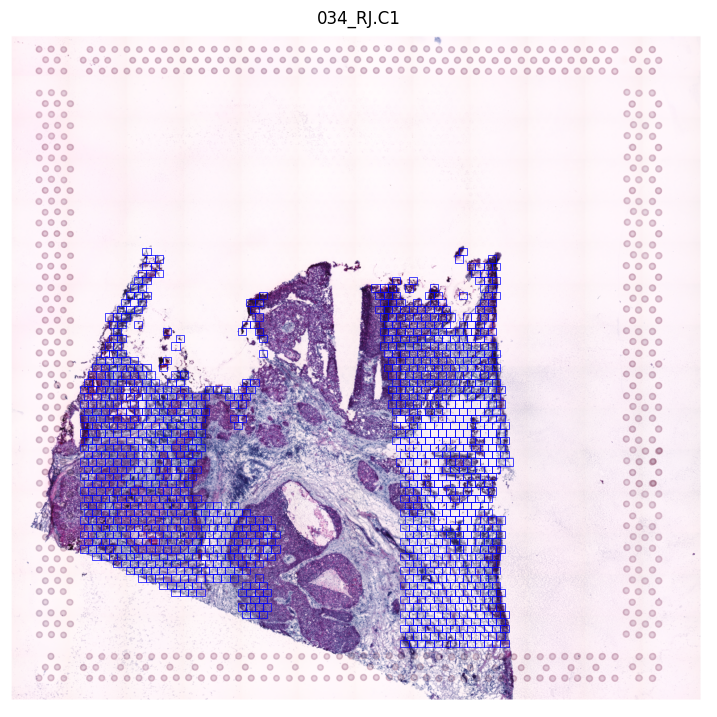

In [21]:
#get the lowres image

size2, image2=openI("/disk2/user/cda/SpatialTranscriptomics/processed-data/SpaceRanger-output_v1.0.0-rerun2023/V10F03-034_C/outs/spatial/tissue_hires_image.png")[0],openI("/disk2/user/cda/SpatialTranscriptomics/processed-data/SpaceRanger-output_v1.0.0-rerun2023/V10F03-034_C/outs/spatial/tissue_hires_image.png")[2]

#adjust with the scale to put the tiles on a low resolution image

scale_x = size2[1] / size[1]
scale_y = size2[0] / size[0]

# Specify plot settings
SAMPLE_TO_PLOT = image_info #sample_id from config file
IMAGE_TYPE_TO_OVERLAY = "color" #either `color` or `gray`

# Extract sample number for specifid patient
#sample_id = config[config["sample_id"] == SAMPLE_TO_PLOT].index[0] #converts str of sample_id into `n` for `samples[n]`

# Plot one slide image with squeres representing the approx sizes of patches in corresponding clusters
PLOT_PATCH_SIZE_h = scale_factor_h*scale_x
PLOT_PATCH_SIZE_v = scale_factor_v*scale_y
fig, ax = plt.subplots(1, 1, figsize=(9,9))
data = spots_edge_tissue #`spots_inside_tissue` is a list or array of coordinates
for row in data:
    ax.add_patch(Rectangle(
                xy = (float(row[0])*scale_x - PLOT_PATCH_SIZE_h / 2, float(row[1])*scale_y - PLOT_PATCH_SIZE_v / 2), 
                width = PLOT_PATCH_SIZE_h, height = PLOT_PATCH_SIZE_v,
                facecolor='none', edgecolor='blue',lw=0.5))
ax.set_title(image_info) #set the tile of a plot to sample_id
ax.axis("off") #remove avis ticks and labels (because these are just spot coordinates)
ax.imshow(image2) #overlay an image of a tissue
ax.set_xlim(0, size2[0]) #enforce the x-scale is exactly the same as image width
ax.set_ylim(0, size2[1]) #enforce the y-scale is exactly the same as image height

# Invert the y-axis to match the image coordinate system
ax.invert_yaxis()

fig.show()

In [23]:
39*39

1521